In [5]:
# Import the packages and classes needed for this example:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

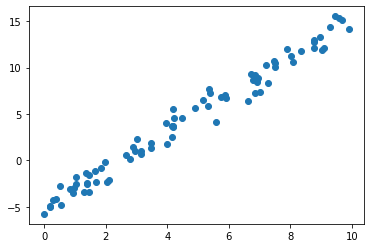

In [6]:
# Create random data with numpy, and plot it with matplotlib:
rnstate = np.random.RandomState(1)

x = 10 * rnstate.rand(80)
y = 2 * x - 5 + rnstate.randn(80)

plt.scatter(x, y);
plt.show()

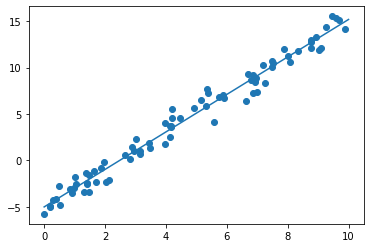

In [7]:
# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the estimated linear regression line with matplotlib:
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

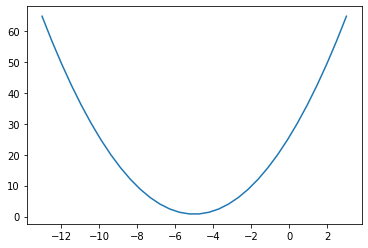

In [8]:
delta = 8
intercept_base = model.intercept_
intercept_variance = np.linspace(intercept_base-delta, intercept_base+delta, num=32)

mse_values = []
for intercept in intercept_variance:
  model.intercept_ = intercept
  y_pred = model.predict(x.reshape(-1, 1))

  mse = mean_squared_error(y, y_pred)
  mse_values.append(mse)

mse_values = torch.tensor(mse_values)

plt.plot(intercept_variance, mse_values);
plt.show()